In [5]:
import pandas as pd
data = pd.read_csv('titanic.csv')

data.head()

passenger_class                                       name      age  \
0             1st                  Allen,MissElisabethWalton  29.0000   
1             1st                   Allison,MissHelenLoraine   2.0000   
2             1st            Allison,MrHudsonJoshuaCreighton  30.0000   
3             1st  Allison,MrsHudsonJ.C.(BessieWaldoDaniels)  25.0000   
4             1st                 Allison,MasterHudsonTrevor   0.9167   

      embarked             home_destination     sex survive  
0  Southampton                   StLouis,MO  female     yes  
1  Southampton  Montreal,PQ/Chesterville,ON  female      no  
2  Southampton  Montreal,PQ/Chesterville,ON    male      no  
3  Southampton  Montreal,PQ/Chesterville,ON  female      no  
4  Southampton  Montreal,PQ/Chesterville,ON    male     yes

In [20]:
#Contingency table
c_table = pd.crosstab(data['sex'], data['survive'])

#Save table
c_table.to_csv('c_table_sex_survive.csv')

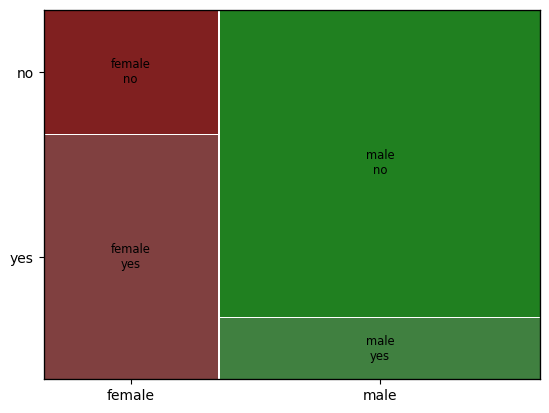

In [22]:
#Mosaic plot
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['sex', 'survive'])
plt.show()

In [28]:
# Show Contingency table
c_table = pd.crosstab(data['sex'], data['survive'])
c_table



survive   no  yes
sex              
female   156  307
male     708  142

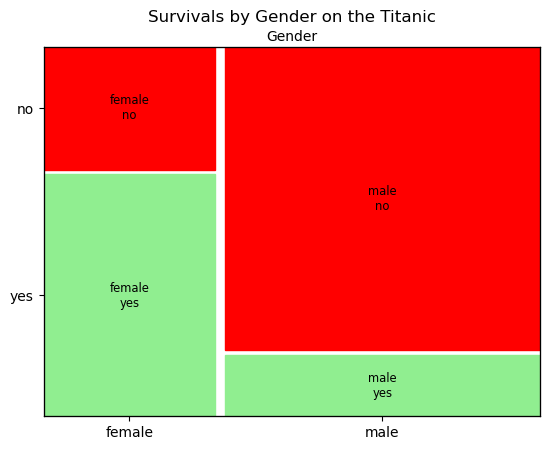

In [39]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
# custom colors
custom_colors = {(sex, survive): ({"color": "lightgreen"} if survive == "yes" else {"color": "red"}) for sex in ['male', 'female'] for survive in ['yes', 'no']}

mosaic(data, ['sex', 'survive'], properties=custom_colors, title='Survivals by Gender on the Titanic', gap=0.02)
plt.xlabel('Gender')
plt.ylabel('Survival Status')
plt.show()

In [47]:
from scipy.stats import chi2_contingency

x, p_value,df, ef = chi2_contingency(c_table)
print("Statistics:", x)
print("Degree Of Freedom:", df)
print("Pvalue :", p_value)

Statistics: 325.5037787069806
Degree Of Freedom: 1
Pvalue : 9.164113332735093e-73


In [46]:
from scipy.stats import fisher_exact

f, p_value = fisher_exact(c_table)
print("Statistics:", f)
print("Pvalue :", p_value)

Statistics: 0.10191575111798155
Pvalue : 5.187445473452701e-73
